# Machine Learning Project 1 - US Trending YouTube Video Regression
### Shih-Tien Wang

Youtube is the biggest video streaming platform in the world and this platform is my favorite website of all time. Thus, the purpose of this project is to Analyze what factors affect how popular a YouTube video will be in the US.

<img src="files/yt.png">

## The Dataset Introduction

* Objective: Classified shot made and shot miss
* Data Rows: 40949
* Data Columns : 16
* Target Variable : 
* Features Variable :
* Kaggle Link : https://www.kaggle.com/datasnaek/youtube-new#US_category_id.json

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('USvideos.csv')
df_org = df.copy() # copy a original dataset
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df.shape

(40949, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.describe(include='O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.24.02,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [7]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


## Explore Target Value's missing status
In my opinion, trending means many people like, many people see and many people discuss.\
Therefore, I will combine columns 
* 'likes'
* 'views'
* 'comment_count'

as a new column calls 'trending'

And this columns will be my target value

In [8]:
df['trending'] = df.likes + df.views + df.comment_count
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,821855
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2528671
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,3345648
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,355486
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2245484


In [9]:
drop_cols = ['likes','views','comment_count']
df.drop(drop_cols, axis=1, inplace=True)

## Checking Missing Values

In [10]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of video_id : 0
Missing value count of trending_date : 0
Missing value count of title : 0
Missing value count of channel_title : 0
Missing value count of category_id : 0
Missing value count of publish_time : 0
Missing value count of tags : 0
Missing value count of dislikes : 0
Missing value count of thumbnail_link : 0
Missing value count of comments_disabled : 0
Missing value count of ratings_disabled : 0
Missing value count of video_error_or_removed : 0
Missing value count of description : 570
Missing value count of trending : 0


# Assign missing values (10%)

In [11]:
mask = np.random.choice([True, False], size = df.shape, p=[.05,.95])
# I will randomly assigne values to all the columns except my target column 'shot_made_flag' and column 'opponent'
target_column = df.trending

df = df.mask(mask)
df = df.assign(trending=target_column)
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38884 non-null  object 
 1   trending_date           38991 non-null  object 
 2   title                   38842 non-null  object 
 3   channel_title           38879 non-null  object 
 4   category_id             38911 non-null  float64
 5   publish_time            38856 non-null  object 
 6   tags                    38920 non-null  object 
 7   dislikes                38886 non-null  float64
 8   thumbnail_link          39029 non-null  object 
 9   comments_disabled       38931 non-null  float64
 10  ratings_disabled        38929 non-null  float64
 11  video_error_or_removed  38949 non-null  float64
 12  description             38346 non-null  object 
 13  trending                40949 non-null  int64  
dtypes: float64(5), int64(1), object(8)
mem

26984

In [12]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of video_id : 2065
Missing value count of trending_date : 1958
Missing value count of title : 2107
Missing value count of channel_title : 2070
Missing value count of category_id : 2038
Missing value count of publish_time : 2093
Missing value count of tags : 2029
Missing value count of dislikes : 2063
Missing value count of thumbnail_link : 1920
Missing value count of comments_disabled : 2018
Missing value count of ratings_disabled : 2020
Missing value count of video_error_or_removed : 2000
Missing value count of description : 2603
Missing value count of trending : 0


## Exploring Features in the dataset

In [13]:
df.columns.tolist()

['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'dislikes',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'trending']

In [14]:
df.columns.nunique()

14

Except our target value - 'trending', I have 13 columns and it time to explore them!

### 1. video_id

In [15]:
df.video_id.value_counts()

j4KvrAUjn6c    29
MAjY8mCTXWk    29
8h--kFui1JA    29
NBSAQenU2Bk    28
QBL8IRJ5yHU    28
               ..
0mAS2Gxs08w     1
be3BHwNi58A     1
9wRQljFNDW8     1
6VJYkH1WfKc     1
m6lY1GXTu5M     1
Name: video_id, Length: 6315, dtype: int64

Since video_id is a arbitrary number, I will drop this column.

In [16]:
df.drop(['video_id'],axis=1,inplace= True)

In [17]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of trending_date : 1958
Missing value count of title : 2107
Missing value count of channel_title : 2070
Missing value count of category_id : 2038
Missing value count of publish_time : 2093
Missing value count of tags : 2029
Missing value count of dislikes : 2063
Missing value count of thumbnail_link : 1920
Missing value count of comments_disabled : 2018
Missing value count of ratings_disabled : 2020
Missing value count of video_error_or_removed : 2000
Missing value count of description : 2603
Missing value count of trending : 0


### 2. trending_date
format -> yy.dd.mm\
covert to one hot vector

In [18]:
df.trending_date.isnull().sum().sum()

1958

In [19]:
type(df.trending_date[1])

str

In [20]:
df.trending_date.unique() 

array(['17.14.11', nan, '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '1

In [21]:
df.trending_date.value_counts()

17.21.12    199
18.02.01    198
18.07.03    197
18.31.05    196
18.18.02    196
           ... 
18.12.03    183
17.11.12    182
18.27.04    181
18.16.05    181
18.20.01    181
Name: trending_date, Length: 205, dtype: int64

The date format is XX.XX.XX and the type is str.\
Therefore, I will use 00.00.00 to replace nan value.

In [22]:
df.trending_date.replace(np.nan,'00.00.00',inplace=True)

In [23]:
df.trending_date.isnull().sum().sum()

0

In [24]:
df.trending_date.nunique()

206

In [25]:
# Transfer to one hot vector type
ohv=pd.get_dummies(df['trending_date'],columns='trending_date',prefix='trending_date')
df=pd.concat([df, ohv], axis=1)
df.drop(['trending_date'],axis=1,inplace= True)
df.columns

Index(['title', 'channel_title', 'category_id', 'publish_time', 'tags',
       'dislikes', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed',
       ...
       'trending_date_18.29.03', 'trending_date_18.29.04',
       'trending_date_18.29.05', 'trending_date_18.30.01',
       'trending_date_18.30.03', 'trending_date_18.30.04',
       'trending_date_18.30.05', 'trending_date_18.31.01',
       'trending_date_18.31.03', 'trending_date_18.31.05'],
      dtype='object', length=218)

### 3. title
'Title' have 6413 unique value. If I convert it to one hot vector type, the columns will become cumbersome and my computer don't have capability to compute it. Therefore, I use columns value counts to replace the original titile column.

In [26]:
df.title.isnull().sum().sum()

2107

In [27]:
df.title.nunique()

6414

The title data type is str.\
Therefore, I will use 'UNKNOWN' to replace nan value.

In [28]:
df.title.replace(np.nan,'UNKNOWN',inplace=True)

In [29]:
df.title.isnull().sum().sum()

0

In [30]:
df.title.value_counts(dropna=False)

UNKNOWN                                                          2107
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                         30
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex      28
Getting some air, Atlas?                                           28
Charlie Puth - BOY [Official Audio]                                28
                                                                 ... 
Titans vs. Chiefs | NFL Wild Card Game Highlights                   1
Roger Federer's  20th Grand Slam Victory Tribute                    1
A Metal Waterfall                                                   1
Melissa Benoist Reveals Best Part About Playing Supergirl           1
Family Feud - Jay Z Ft. Beyoncé (Explicit)                          1
Name: title, Length: 6415, dtype: int64

In [31]:
df['title_count'] = df['title'].map(df['title'].value_counts())

In [32]:
df[['title','title_count']]

,title,title_count
0,WE WANT TO TALK ABOUT OUR MARRIAGE,7
1,The Trump Presidency: Last Week Tonight with J...,7
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",6
3,Nickelback Lyrics: Real or Fake?,7
4,UNKNOWN,2107
...,...,...
40944,The Cat Who Caught the Laser,23
40945,True Facts : Ant Mutualism,25
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,25
40947,How Black Panther Should Have Ended,3


In [33]:
# drop the 'title'
df.drop('title', axis=1, inplace = True)

### 4. channel_title
'channel_title' have 2000 unique value. If I convert it to one hot vector type, the columns will become cumbersome and my computer don't have capability to compute it. Therefore, I use columns value counts to replace the original channel_title column.\
The handling method is the same as 'title'.

In [34]:
df.channel_title.isnull().sum().sum()

2070

In [35]:
type(df.channel_title[1])

str

In [36]:
df.channel_title.nunique()

2199

In [37]:
df.channel_title.value_counts()

ESPN                                      192
The Tonight Show Starring Jimmy Fallon    186
Vox                                       185
Netflix                                   184
TheEllenShow                              183
                                         ... 
Max Joseph                                  1
SiggasNation™                               1
Thomas Sebastian                            1
ClovesVEVO                                  1
HiHo Kids                                   1
Name: channel_title, Length: 2199, dtype: int64

Replace missing values by 'UNKNOWN'

In [38]:
df.channel_title.replace(np.nan, 'UNKNOWN', inplace=True)

In [39]:
df.channel_title.isnull().sum().sum()

0

In [40]:
df.channel_title.nunique()

2200

In [41]:
df['channel_title'].map(df['channel_title'].value_counts())

0         92
1         22
2         72
3        142
4         84
        ... 
40944     62
40945     48
40946     34
40947      3
40948     39
Name: channel_title, Length: 40949, dtype: int64

In [42]:
df['channel_title_counts'] = df['channel_title'].map(df['channel_title'].value_counts())

In [43]:
# drop the 'title'
df.drop('channel_title', axis=1, inplace = True)

In [44]:
df.head()

,category_id,publish_time,tags,dislikes,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending,...,trending_date_18.29.05,trending_date_18.30.01,trending_date_18.30.03,trending_date_18.30.04,trending_date_18.30.05,trending_date_18.31.01,trending_date_18.31.03,trending_date_18.31.05,title_count,channel_title_counts
0,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,2966.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,0.0,0.0,0.0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,821855,...,0,0,0,0,0,0,0,0,7,92
1,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",6146.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0.0,0.0,0.0,"One year after the presidential election, John...",2528671,...,0,0,0,0,0,0,0,0,7,22
2,23.0,2017-11-12T19:05:24.000Z,NaN,5339.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0.0,0.0,0.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,3345648,...,0,0,0,0,0,0,0,0,6,72
3,24.0,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",666.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,0.0,0.0,0.0,Today we find out if Link is a Nickelback amat...,355486,...,0,0,0,0,0,0,0,0,7,142
4,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1989.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0.0,0.0,0.0,I know it's been a while since we did this sho...,2245484,...,0,0,0,0,0,0,0,0,2107,84


In [45]:
df.columns.tolist()

['category_id',
 'publish_time',
 'tags',
 'dislikes',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'trending',
 'trending_date_00.00.00',
 'trending_date_17.01.12',
 'trending_date_17.02.12',
 'trending_date_17.03.12',
 'trending_date_17.04.12',
 'trending_date_17.05.12',
 'trending_date_17.06.12',
 'trending_date_17.07.12',
 'trending_date_17.08.12',
 'trending_date_17.09.12',
 'trending_date_17.10.12',
 'trending_date_17.11.12',
 'trending_date_17.12.12',
 'trending_date_17.13.12',
 'trending_date_17.14.11',
 'trending_date_17.14.12',
 'trending_date_17.15.11',
 'trending_date_17.15.12',
 'trending_date_17.16.11',
 'trending_date_17.16.12',
 'trending_date_17.17.11',
 'trending_date_17.17.12',
 'trending_date_17.18.11',
 'trending_date_17.18.12',
 'trending_date_17.19.11',
 'trending_date_17.19.12',
 'trending_date_17.20.11',
 'trending_date_17.20.12',
 'trending_date_17.21.11',
 'trending_date_17.21.12',
 'trending_date_1

### 5. category_id

ID intoduction:
* 1	Film & Animation
* 2	Autos & Vehicles
* 10	Music
* 15	Pets & Animals
* 17	Sports
* 18	Short Movies
* 19	Travel & Events
* 20	Gaming
* 21	Videoblogging
* 22	People & Blogs
* 23	Comedy
* 24	Entertainment
* 25	News & Politics
* 26	Howto & Style
* 27	Education
* 28	Science & Technology
* 29	Nonprofits & Activism
* 30	Movies
* 31	Anime/Animation
* 32	Action/Adventure
* 33	Classics
* 34	Comedy
* 35	Documentary
* 36	Drama
* 37	Family
* 38	Foreign
* 39	Horror
* 40	Sci-Fi/Fantasy
* 41	Thriller
* 42	Shorts
* 43	Shows
* 44	Trailers

In [46]:
df.category_id.value_counts(dropna=False)

24.0    9434
10.0    6163
26.0    3943
23.0    3281
22.0    3057
25.0    2379
28.0    2291
1.0     2222
17.0    2075
NaN     2038
27.0    1563
15.0     874
20.0     771
19.0     386
2.0      362
43.0      56
29.0      54
Name: category_id, dtype: int64

In [47]:
id_dic={1:	'Film & Animation',
2:	'Autos & Vehicles',
10:	'Music',
15:	'Pets & Animals',
17:	'Sports',
18:	'Short Movies',
19:	'Travel & Events',
20:	'Gaming',
21:	'Videoblogging',
22:	'People & Blogs',
23:	'Comedy',
24:	'Entertainment',
25:	'News & Politics',
26:	'Howto & Style',
27:	'Education',
28:	'Science & Technology',
29:	'Nonprofits & Activism',
30:	'Movies',
31:	'Anime/Animation',
32:	'Action/Adventure',
33:	'Classics',
34:	'Comedy',
35:	'Documentary',
36:	'Drama',
37:	'Family',
38:	'Foreign',
39:	'Horror',
40:	'Sci-Fi/Fantasy',
41:	'Thriller',
42:	'Shorts',
43:	'Shows',
44:	'Trailers'}

df.category_id = df.category_id.map(id_dic)

In [48]:
df.category_id.value_counts(dropna=False)

Entertainment            9434
Music                    6163
Howto & Style            3943
Comedy                   3281
People & Blogs           3057
News & Politics          2379
Science & Technology     2291
Film & Animation         2222
Sports                   2075
NaN                      2038
Education                1563
Pets & Animals            874
Gaming                    771
Travel & Events           386
Autos & Vehicles          362
Shows                      56
Nonprofits & Activism      54
Name: category_id, dtype: int64

In [49]:
# replace nan values by 'UNKNOWN'
df.category_id.replace(np.nan, 'UNKNOWN', inplace=True)
df.category_id.isnull().sum()

0

In [50]:
# convert to one hot vector
ohv=pd.get_dummies(df['category_id'],columns='category_id',prefix='category_id')
df=pd.concat([df, ohv], axis=1)
df.drop(['category_id'],axis=1,inplace= True)
df.columns

Index(['publish_time', 'tags', 'dislikes', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'trending', 'trending_date_00.00.00',
       ...
       'category_id_Music', 'category_id_News & Politics',
       'category_id_Nonprofits & Activism', 'category_id_People & Blogs',
       'category_id_Pets & Animals', 'category_id_Science & Technology',
       'category_id_Shows', 'category_id_Sports',
       'category_id_Travel & Events', 'category_id_UNKNOWN'],
      dtype='object', length=234)

In [51]:
df.columns.nunique()

234

### 6. publish_time

In [52]:
df.publish_time.value_counts()

2018-05-18T14:00:04.000Z    47
2018-05-06T13:00:05.000Z    32
2018-05-14T15:59:47.000Z    29
2018-05-09T17:00:00.000Z    29
2018-05-11T04:00:34.000Z    28
                            ..
2017-12-13T14:01:32.000Z     1
2018-04-14T13:00:07.000Z     1
2017-11-13T13:45:16.000Z     1
2018-01-25T13:00:06.000Z     1
2018-02-21T02:48:23.000Z     1
Name: publish_time, Length: 6225, dtype: int64

In [53]:
df.publish_time.nunique()

6225

In [54]:
df.publish_time = [x[0:7] if isinstance(x, str) else np.nan for x in df.publish_time]
df.publish_time

0        2017-11
1        2017-11
2        2017-11
3        2017-11
4        2017-11
          ...   
40944    2018-05
40945    2018-05
40946    2018-05
40947    2018-05
40948    2018-05
Name: publish_time, Length: 40949, dtype: object

In [55]:
# use 0000-00-00 to replace missing values
df.publish_time.fillna('0000-00', inplace=True)
df.publish_time.isnull().sum().sum()

0

In [56]:
# Transfer to one hot vector type
ohv=pd.get_dummies(df['publish_time'],columns='publish_time',prefix='publish_time')
df=pd.concat([df, ohv], axis=1)
df.drop(['publish_time'],axis=1,inplace= True)
df.columns

Index(['tags', 'dislikes', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'trending',
       'trending_date_00.00.00', 'trending_date_17.01.12',
       ...
       'publish_time_2017-09', 'publish_time_2017-10', 'publish_time_2017-11',
       'publish_time_2017-12', 'publish_time_2018-01', 'publish_time_2018-02',
       'publish_time_2018-03', 'publish_time_2018-04', 'publish_time_2018-05',
       'publish_time_2018-06'],
      dtype='object', length=297)

### 7. tags

In [57]:
df.tags.value_counts()

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1450
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"                                                        83


The tags column seems useless. However, I am curious about if the video has more tags will effecting trending or not. Therefore, I create a new column 'tags_words_count' to count the tags' numbers.

In [58]:
df['tags_words_count'] = df.tags.apply(lambda x: len(str(x).split('|')))
df.tags_words_count

0         1
1         4
2         1
3        27
4        14
         ..
40944    14
40945     1
40946    24
40947    22
40948     4
Name: tags_words_count, Length: 40949, dtype: int64

In [59]:
df.drop('tags', axis=1, inplace=True)

### 8. dislikes

In [60]:
df.dislikes.value_counts()

0.0        363
1.0        151
4.0        115
5.0         92
2.0         89
          ... 
64636.0      1
8763.0       1
11537.0      1
4990.0       1
32620.0      1
Name: dislikes, Length: 8268, dtype: int64

In [61]:
# using mean to replace missing values
df.dislikes.fillna(df.dislikes.mean(),inplace=True)
df.dislikes.isnull().sum().sum()

0

### 9. thumbnail_link
Drop the column because it is basically the same as channel_title.

In [62]:
df.thumbnail_link.value_counts()

https://i.ytimg.com/vi/NBSAQenU2Bk/default.jpg    29
https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg    29
https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg    28
https://i.ytimg.com/vi/r-3iathMo7o/default.jpg    28
https://i.ytimg.com/vi/iILJvqrAQ_w/default.jpg    28
                                                  ..
https://i.ytimg.com/vi/cJHA4lLp32M/default.jpg     1
https://i.ytimg.com/vi/D3uvvA7dyoI/default.jpg     1
https://i.ytimg.com/vi/kA66nAvEEII/default.jpg     1
https://i.ytimg.com/vi/HBS9783c0BI/default.jpg     1
https://i.ytimg.com/vi/Fxwe_i96ye8/default.jpg     1
Name: thumbnail_link, Length: 6320, dtype: int64

In [63]:
df.drop('thumbnail_link', axis=1, inplace=True)

### 10. comments_disabled

In [64]:
df.comments_disabled.value_counts(dropna=False)

0.0    38339
NaN     2018
1.0      592
Name: comments_disabled, dtype: int64

Assign majority group '0' into the missing values

In [65]:
df.comments_disabled.fillna(0,inplace=True)
df.comments_disabled.isnull().sum()

0

In [66]:
# convert to one hot vector
ohv=pd.get_dummies(df['comments_disabled'],columns='comments_disabled',prefix='comments_disabled')
df=pd.concat([df, ohv], axis=1)
df.drop(['comments_disabled'],axis=1,inplace= True)
df.columns

Index(['dislikes', 'ratings_disabled', 'video_error_or_removed', 'description',
       'trending', 'trending_date_00.00.00', 'trending_date_17.01.12',
       'trending_date_17.02.12', 'trending_date_17.03.12',
       'trending_date_17.04.12',
       ...
       'publish_time_2017-12', 'publish_time_2018-01', 'publish_time_2018-02',
       'publish_time_2018-03', 'publish_time_2018-04', 'publish_time_2018-05',
       'publish_time_2018-06', 'tags_words_count', 'comments_disabled_0.0',
       'comments_disabled_1.0'],
      dtype='object', length=297)

### 11. ratings_disabled

In [67]:
df.ratings_disabled.value_counts(dropna=False)

0.0    38769
NaN     2020
1.0      160
Name: ratings_disabled, dtype: int64

Assign majority group '0' into the missing values

In [68]:
df.ratings_disabled.fillna(0,inplace=True)
df.ratings_disabled.isnull().sum()

0

In [69]:
# convert to one hot vector
ohv=pd.get_dummies(df['ratings_disabled'],columns='ratings_disabled',prefix='ratings_disabled')
df=pd.concat([df, ohv], axis=1)
df.drop(['ratings_disabled'],axis=1,inplace= True)
df.columns

Index(['dislikes', 'video_error_or_removed', 'description', 'trending',
       'trending_date_00.00.00', 'trending_date_17.01.12',
       'trending_date_17.02.12', 'trending_date_17.03.12',
       'trending_date_17.04.12', 'trending_date_17.05.12',
       ...
       'publish_time_2018-02', 'publish_time_2018-03', 'publish_time_2018-04',
       'publish_time_2018-05', 'publish_time_2018-06', 'tags_words_count',
       'comments_disabled_0.0', 'comments_disabled_1.0',
       'ratings_disabled_0.0', 'ratings_disabled_1.0'],
      dtype='object', length=298)

Assign majority group '0' into the missing values

### 12. video_error_or_removed

In [70]:
df.video_error_or_removed.value_counts(dropna=False)

0.0    38928
NaN     2000
1.0       21
Name: video_error_or_removed, dtype: int64

Assign majority group '0' into the missing values

In [71]:
df.video_error_or_removed.fillna(0,inplace=True)
df.video_error_or_removed.isnull().sum()

0

In [72]:
# convert to one hot vector
ohv=pd.get_dummies(df['video_error_or_removed'],columns='video_error_or_removed',prefix='video_error_or_removed')
df=pd.concat([df, ohv], axis=1)
df.drop(['video_error_or_removed'],axis=1,inplace= True)
df.columns

Index(['dislikes', 'description', 'trending', 'trending_date_00.00.00',
       'trending_date_17.01.12', 'trending_date_17.02.12',
       'trending_date_17.03.12', 'trending_date_17.04.12',
       'trending_date_17.05.12', 'trending_date_17.06.12',
       ...
       'publish_time_2018-04', 'publish_time_2018-05', 'publish_time_2018-06',
       'tags_words_count', 'comments_disabled_0.0', 'comments_disabled_1.0',
       'ratings_disabled_0.0', 'ratings_disabled_1.0',
       'video_error_or_removed_0.0', 'video_error_or_removed_1.0'],
      dtype='object', length=299)

### 13. description

In [73]:
df.description.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

The description column seems useless. However, I am curious about if a description has much words will it effect trending or not. Therefore, I create a new column 'description_words_count' to count the description words.

In [74]:
df['description_words_count'] = df.description.str.count(' ') + 1
df.drop('description', axis=1, inplace=True)

In [75]:
df.description_words_count

0        136.0
1         80.0
2         74.0
3        123.0
4         53.0
         ...  
40944      9.0
40945      NaN
40946     67.0
40947    242.0
40948     76.0
Name: description_words_count, Length: 40949, dtype: float64

Using mean value of description_words_count to replace missing values.

In [76]:
df['description_words_count'].fillna((df['description_words_count'].mean()), inplace=True)

In [77]:
df.description_words_count.isnull().sum()

0

In [78]:
for colname in df.columns:
    print('Missing value count of {} : {}'.format(colname, df[colname].isnull().sum()))

Missing value count of dislikes : 0
Missing value count of trending : 0
Missing value count of trending_date_00.00.00 : 0
Missing value count of trending_date_17.01.12 : 0
Missing value count of trending_date_17.02.12 : 0
Missing value count of trending_date_17.03.12 : 0
Missing value count of trending_date_17.04.12 : 0
Missing value count of trending_date_17.05.12 : 0
Missing value count of trending_date_17.06.12 : 0
Missing value count of trending_date_17.07.12 : 0
Missing value count of trending_date_17.08.12 : 0
Missing value count of trending_date_17.09.12 : 0
Missing value count of trending_date_17.10.12 : 0
Missing value count of trending_date_17.11.12 : 0
Missing value count of trending_date_17.12.12 : 0
Missing value count of trending_date_17.13.12 : 0
Missing value count of trending_date_17.14.11 : 0
Missing value count of trending_date_17.14.12 : 0
Missing value count of trending_date_17.15.11 : 0
Missing value count of trending_date_17.15.12 : 0
Missing value count of trend

In [79]:
df.isnull().sum().sum()

0

In [80]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 299 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   dislikes                           float64
 1   trending                           int64  
 2   trending_date_00.00.00             uint8  
 3   trending_date_17.01.12             uint8  
 4   trending_date_17.02.12             uint8  
 5   trending_date_17.03.12             uint8  
 6   trending_date_17.04.12             uint8  
 7   trending_date_17.05.12             uint8  
 8   trending_date_17.06.12             uint8  
 9   trending_date_17.07.12             uint8  
 10  trending_date_17.08.12             uint8  
 11  trending_date_17.09.12             uint8  
 12  trending_date_17.10.12             uint8  
 13  trending_date_17.11.12             uint8  
 14  trending_date_17.12.12             uint8  
 15  trending_date_17.13.12             uint8  
 16  trending_date_17.14.1

In [81]:
df.shape

(40949, 299)

In [82]:
#!! Due to the dataset is too huge, my computer can't compute it. I will only use partial of this dataset for modeling
df_impute_org = df.copy()
df = df.sample(frac=0.1, random_state = 0)

In [83]:
df.shape

(4095, 299)

Now, I finished handling missing values. There are 8855 columns in my dataframe.
Next step, spliting and scaling dataframe!

## Spliting dataframe

dataframe shape: (40949, 299)\
X's number : 298\
y's number : 1 (trending)

In [84]:
X = df.drop('trending', axis = 1) 
y = df.trending

In [85]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Scaling dataframe

Scaling method -> StandardScaler( )\
Because I want to decrease the influence of outliers.

In [86]:
from sklearn.preprocessing import StandardScaler

# scale the dataset
# 1. instantiate the scalar
# 2. fit the scalar
# 3. transform
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Creat dataframe for train_x and test_x. (easy to read)

In [87]:
X_train_df = pd.DataFrame(X_train, columns = X.columns) #data type array -> dataframe
X_train_df.head()

,dislikes,trending_date_00.00.00,trending_date_17.01.12,trending_date_17.02.12,trending_date_17.03.12,trending_date_17.04.12,trending_date_17.05.12,trending_date_17.06.12,trending_date_17.07.12,trending_date_17.08.12,...,publish_time_2018-05,publish_time_2018-06,tags_words_count,comments_disabled_0.0,comments_disabled_1.0,ratings_disabled_0.0,ratings_disabled_1.0,video_error_or_removed_0.0,video_error_or_removed_1.0,description_words_count
0,-0.160420,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,-1.202792,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.002181
1,-0.206286,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,2.258442,-0.130673,0.903826,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.002181
2,-0.221976,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,1.227921,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,0.152311
3,-0.195281,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,-1.445864,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-1.137406
4,-0.239584,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,0.012564,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.002181


In [88]:
X_test_df = pd.DataFrame(X_test, columns = X.columns) #data type array -> dataframe
X_test_df.head()

,dislikes,trending_date_00.00.00,trending_date_17.01.12,trending_date_17.02.12,trending_date_17.03.12,trending_date_17.04.12,trending_date_17.05.12,trending_date_17.06.12,trending_date_17.07.12,trending_date_17.08.12,...,publish_time_2018-05,publish_time_2018-06,tags_words_count,comments_disabled_0.0,comments_disabled_1.0,ratings_disabled_0.0,ratings_disabled_1.0,video_error_or_removed_0.0,video_error_or_removed_1.0,description_words_count
0,-0.223467,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,-0.716650,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.303454
1,-0.231490,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,0.822802,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.497396
2,-0.062299,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,1.227921,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,1.296572
3,-0.159852,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,2.605325,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.749521
4,-0.228863,-0.203279,-0.063119,-0.060634,-0.046274,-0.087692,-0.076378,-0.063119,-0.058044,-0.058044,...,-0.442783,-0.130673,0.984849,0.11118,-0.11118,0.055334,-0.055334,0.024716,-0.024716,-0.002181


After we finished the tough part, let's dive into the fun part - Modeling!

# Modeling - Regression
In this project, I will run
1. KNN Repressor
2. Linear Regression
3. Ridge
4. Lasso
5. Polynomial Regression
6. SVM both simple and with kernels (rbf, poly, linear)

and find out which model is the best fit for this dataset. (criteria: processing time and accuracy)

## 1. KNN Repressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
# Grid Search & Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [90]:
knn_param_grid = {'n_neighbors':[1, 5, 10, 50]}

knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv =5 , return_train_score= True, iid = False)
knn_grid_search.fit(X_train, y_train)
print("Best parameters: ", knn_grid_search.best_params_)
print("Best score: {:.4f}".format(knn_grid_search.best_score_))

y_true, y_pred = y_test, knn_grid_search.predict(X_test)
print("MSE for test data set: %.2f"
              % (mean_squared_error(y_pred, y_true)))

knn_result = pd.DataFrame(knn_grid_search.cv_results_)

Best parameters:  {'n_neighbors': 50}
Best score: 0.1019
MSE for test data set: 27267249065990.82


In [91]:
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024893,0.003151,0.204792,0.012845,1,{'n_neighbors': 1},-0.141750,0.316565,0.101927,-0.081513,...,-0.026373,0.219478,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.023324,0.000992,0.393259,0.004988,5,{'n_neighbors': 5},0.025694,0.098233,0.038675,0.003740,...,0.023335,0.048092,3,0.396850,0.337680,0.329206,0.381247,0.374208,0.363838,0.026015
2,0.023565,0.001090,0.628459,0.042336,10,{'n_neighbors': 10},-0.000778,0.054993,0.234169,0.066107,...,0.072225,0.085078,2,0.220956,0.265024,0.179325,0.235198,0.251731,0.230447,0.029580
3,0.024704,0.002373,0.787777,0.073951,50,{'n_neighbors': 50},0.204135,0.021917,0.150439,0.099964,...,0.101912,0.069198,1,0.136196,0.133110,0.119698,0.150662,0.168293,0.141592,0.016587


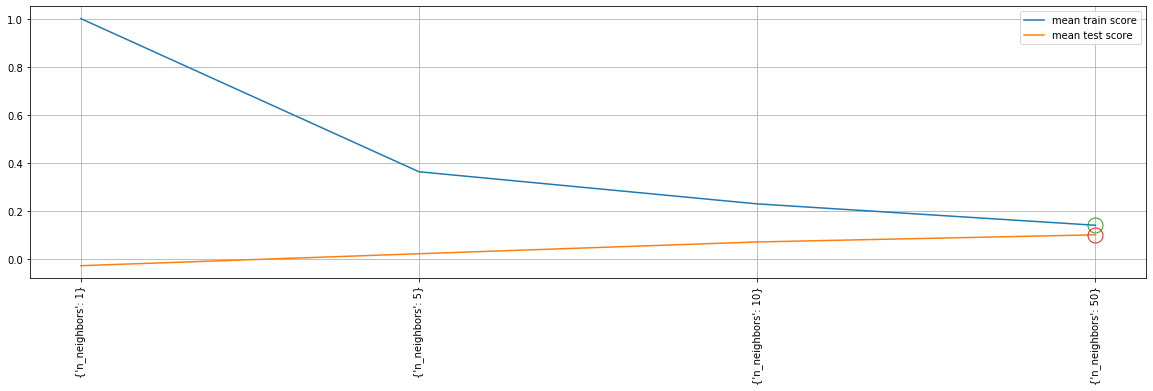

In [92]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_train_score'], label = 'mean train score')
plt.plot(range(knn_result['params'].shape[0]), knn_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(knn_result['params'].shape[0]), knn_result['params'], rotation = 90)
plt.plot([knn_grid_search.best_index_], knn_result['mean_train_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid_search.best_index_], knn_result['mean_test_score'][knn_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Based on the plot above, when n_neighbors equal 50, the model have the best result. Therefore, I will use this parameter to predict the test dataset and see the result.

In [132]:
%%time
best_grid_knn = KNeighborsRegressor(n_neighbors=50)
best_grid_knn.fit(X_train, y_train)
print(best_grid_knn.predict(X_test).mean())
knn_pred = knn_grid_search.predict(X_test)
print(metrics.r2_score(y_test, knn_pred))

2496759.711794872
0.06925005879638924
CPU times: user 2.45 s, sys: 77 ms, total: 2.53 s
Wall time: 2.77 s


In [94]:
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024893,0.003151,0.204792,0.012845,1,{'n_neighbors': 1},-0.141750,0.316565,0.101927,-0.081513,...,-0.026373,0.219478,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.023324,0.000992,0.393259,0.004988,5,{'n_neighbors': 5},0.025694,0.098233,0.038675,0.003740,...,0.023335,0.048092,3,0.396850,0.337680,0.329206,0.381247,0.374208,0.363838,0.026015
2,0.023565,0.001090,0.628459,0.042336,10,{'n_neighbors': 10},-0.000778,0.054993,0.234169,0.066107,...,0.072225,0.085078,2,0.220956,0.265024,0.179325,0.235198,0.251731,0.230447,0.029580
3,0.024704,0.002373,0.787777,0.073951,50,{'n_neighbors': 50},0.204135,0.021917,0.150439,0.099964,...,0.101912,0.069198,1,0.136196,0.133110,0.119698,0.150662,0.168293,0.141592,0.016587


## 2. Linear Regression

In [95]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Cross Validation

In [96]:
lr = LinearRegression()
#cv is the number of folds, scores will give an array of scores    
lr_scores = cross_val_score(lr, X_train, y_train, cv = 5) 
print(lr_scores, np.mean(lr_scores), np.std(lr_scores))

#y_test is to get scores for each fold of cv
lr_predict = cross_val_predict(lr, X_test, y_test, cv = 5)    
accuracy = metrics.r2_score(y_test, lr_predict)
accuracy.mean()
#print(metrics.r2_score(y_test, lr_predict))

[-1.30614628e+27 -7.54876294e+25 -3.63441241e+24  6.16152336e-01
 -3.93214920e+25] -2.8491796337093514e+26 5.113481503852398e+26


-4.3911246262884674e+26

In [137]:
lr.fit(X_train, y_train)

lr_estimate = lr.predict(X_test)  

# present model performance
print("Train   score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test    score: {:.4f}".format(lr.score(X_test, y_test)))
print("Predict score: {:.4f}".format(lr.predict(X_test).mean()))

Train   score: 0.6809
Test    score: -85366843836520265154560.0000
Predict score: 110518965516407936.0000


## 3. Ridge

In [98]:
from sklearn.linear_model import Ridge

In [99]:
alphas = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
ridge_grid_search = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), return_train_score= True, iid = False, cv=5)
ridge_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(ridge_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(ridge_grid_search.best_score_))

ridge_result = pd.DataFrame(ridge_grid_search.cv_results_)

Best parameters: {'alpha': 1000.0}
Best cross-validation score: 0.5350


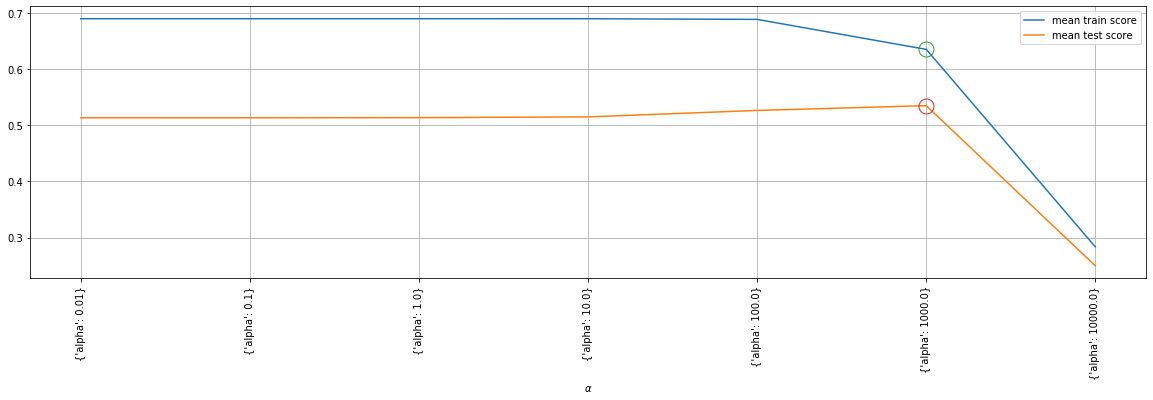

In [100]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(ridge_result['params'].shape[0]), ridge_result['mean_train_score'], label = 'mean train score')
plt.plot(range(ridge_result['params'].shape[0]), ridge_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(ridge_result['params'].shape[0]), ridge_result['params'], rotation = 90)
plt.plot([ridge_grid_search.best_index_], ridge_result['mean_train_score'][ridge_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([ridge_grid_search.best_index_], ridge_result['mean_test_score'][ridge_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()

Based on the plot above, when alpha equal 1000, the model have the best result. Therefore, I will use this parameter to predict the test dataset and see the result.

In [138]:
%%time
ridge_pred = ridge_grid_search.predict(X_test)
ridge_pred
print(metrics.r2_score(y_test, ridge_pred, multioutput='uniform_average'))

best_ridge = Ridge(alpha = 1000)
best_ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(best_ridge.score(X_train,y_train)))
print('Test  score: {:.4f}'.format(best_ridge.score(X_test, y_test)))
print("Predict score: {:.4f}".format(best_ridge.predict(X_test).mean()))

0.3779080709548588
Train score: 0.6423
Test  score: 0.3779
Predict score: 2448445.0797
CPU times: user 47 ms, sys: 19.7 ms, total: 66.7 ms
Wall time: 47.5 ms


## 4. Lasso

In [102]:
from sklearn.linear_model import Lasso

In [103]:
alphas = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000])
# create and fit a lasso regression model, testing each alpha
model = Lasso()
lasso_grid_search = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), return_train_score= True, iid = False, cv=5)
lasso_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(lasso_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lasso_grid_search.best_score_))

lasso_result = pd.DataFrame(ridge_grid_search.cv_results_)

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5634609818796544e+16, tolerance: 21225151292517.406
  positive)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3382279042642272.0, tolerance: 23479822380490.55
  positive)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1964519522163652e+16, tolerance: 20558195582142.633
  positive)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective

Best parameters: {'alpha': 10000.0}
Best cross-validation score: 0.5159


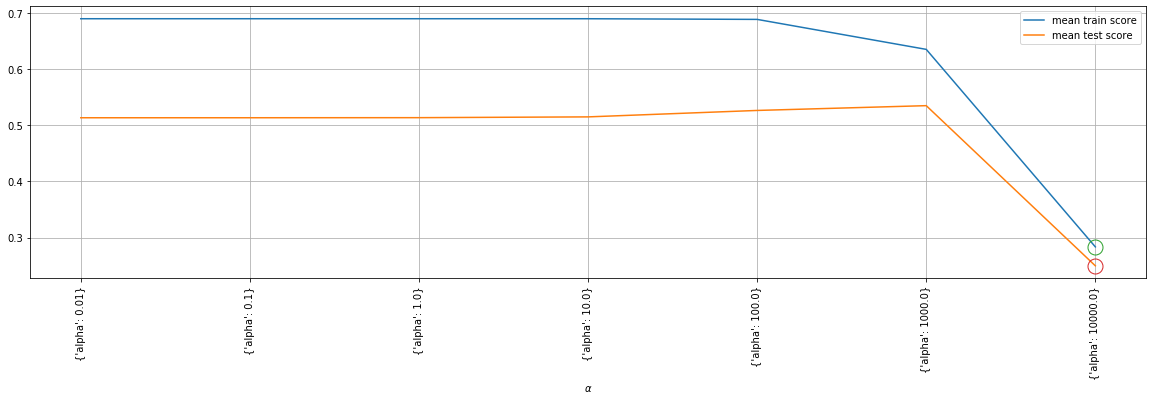

In [104]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(lasso_result['params'].shape[0]), lasso_result['mean_train_score'], label = 'mean train score')
plt.plot(range(lasso_result['params'].shape[0]), lasso_result['mean_test_score'], label = 'mean test score')
plt.xticks(range(lasso_result['params'].shape[0]), lasso_result['params'], rotation = 90)
plt.plot([lasso_grid_search.best_index_], lasso_result['mean_train_score'][lasso_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lasso_grid_search.best_index_], lasso_result['mean_test_score'][lasso_grid_search.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()

In [139]:
%%time
lasso_pred = lasso_grid_search.predict(X_test)
lasso_pred
print(metrics.r2_score(y_test, lasso_pred, multioutput='uniform_average'))

best_lasso = Lasso(alpha = 10000.0)
best_lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(best_lasso.score(X_train,y_train)))
print('Test  score: {:.4f}'.format(best_lasso.score(X_test, y_test)))
print("Predict score: {:.4f}".format(best_lasso.predict(X_test).mean()))

0.25925699207808683
Train score: 0.6806
Test  score: 0.2593
Predict score: 2336867.3671
CPU times: user 42.2 ms, sys: 24.9 ms, total: 67.2 ms
Wall time: 83.2 ms


## 5. Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [107]:
poly_col = ['Degree', 'Train Score', 'Test Score']
poly_grid_search_result = pd.DataFrame(columns = poly_col)

In [108]:
lreg = LinearRegression()
poly_train_score_list = []
poly_test_score_list  = []

In [109]:
# Degree = 1
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
to_append = [1, lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test)]
df_length = len(poly_grid_search_result)
poly_grid_search_result.loc[df_length] = to_append
poly_train_score_list.append(lreg.score(X_train_poly, y_train))
poly_test_score_list.append(lreg.score(X_test_poly, y_test))

In [110]:
# Degree = 2
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
to_append = [2, lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test)]
df_length = len(poly_grid_search_result)
poly_grid_search_result.loc[df_length] = to_append
poly_train_score_list.append(lreg.score(X_train_poly, y_train))
poly_test_score_list.append(lreg.score(X_test_poly, y_test))

In [111]:
# Degree = 3
# poly = PolynomialFeatures(3)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)
# lreg.fit(X_train_poly, y_train)
# to_append = [3, lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test)]
# df_length = len(poly_grid_search_result)
# poly_grid_search_result.loc[df_length] = to_append
# poly_train_score_list.append(lreg.score(X_train_poly, y_train))
# poly_test_score_list.append(lreg.score(X_test_poly, y_test))

In [112]:
poly_grid_search_result.head()

,Degree,Train Score,Test Score
0,1.0,0.679499,-8.744299e+22
1,2.0,0.982240,-2.366285e+23


## Degree 2 have better result!

In [146]:
poly = PolynomialFeatures(degree=2)
# Instantiate
lg = LinearRegression()
# Fit LinearRegression
poly = lg.fit(X_train_poly, y_train)
# coefficients
lg.coef_

scores_1 = cross_val_score(poly, X_train_poly, y_train, cv=5)
scores_2 = cross_val_score(poly, X_test_poly, y_test, cv=5)

print("Average cross-validation train score: {:.4f}".format(scores_1.mean()))
print("Average cross-validation test score: {:.4f}".format(scores_2.mean()))
print("Predict score: {:.4f}".format(lg.predict(X_test_poly).mean()))

Average cross-validation train score: -4364087585721162240.0000
Average cross-validation test score: -0.0383
Predict score: -101591799075579072.0000


## 6. SVM both simple and with kernels (rbf, poly, linear)

### 1. rbf

In [114]:
from sklearn.svm import SVR
from sklearn import svm

svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train,y_train)

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
print("Training set score: {:.4f}".format(svr_rbf.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(svr_rbf.score(X_test, y_test))) 

Training set score: -0.0451
Test set score: -0.0658


### Grid Search

In [116]:
regr_rbf = SVR(kernel="rbf")
C = [1000, 10, 1]
gamma = [0.005, 0.004, 0.003, 0.002, 0.001]
epsilon = [0.1, 0.01]
parameters = {"C":C, "gamma":gamma, "epsilon":epsilon}

gs = GridSearchCV(regr_rbf, parameters, scoring="r2")
gs.fit(X_train, y_train)

print("Best Estimator: {}".format(gs.best_estimator_))
print("Type: %r" % (type(gs.best_estimator_)))
print("Best score: {}".format(gs.best_score_))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Estimator: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.003,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Type: <class 'sklearn.svm.classes.SVR'>
Best score: -0.04493281646479441


### Cross Validation

In [117]:
svr_rbf_scores_1 = cross_val_score(svr_rbf, X_train, y_train)
svr_rbf_scores_2 = cross_val_score(svr_rbf, X_test, y_test)

print("SVR rbf Regression Cross-validation train scores: {}".format(svr_rbf_scores_1))
print("SVR rbf Regression Cross-validation train scores: {}".format(svr_rbf_scores_2))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.p

SVR rbf Regression Cross-validation train scores: [-0.04872749 -0.04937383 -0.03715261]
SVR rbf Regression Cross-validation train scores: [-0.09704467 -0.04857258 -0.08394281]


/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Using 5 folds

In [118]:
scores_1 = cross_val_score(svr_rbf, X_train, y_train, cv=5)
scores_2 = cross_val_score(svr_rbf, X_test, y_test, cv=5)

print("Average cross-validation train score: {:.3f}".format(scores_1.mean()))
print("Average cross-validation test score: {:.3f}".format(scores_2.mean()))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/

Average cross-validation train score: -0.046
Average cross-validation test score: -0.079


### 2. poly

In [119]:
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train,y_train)
print("Training set score: {:.4f}".format(svr_poly.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(svr_poly.score(X_test, y_test))) 

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training set score: -0.0451
Test set score: -0.0658


### Grid Search

In [120]:
regr_poly = SVR(kernel="poly")
C = [1000, 10, 1]
gamma = [0.005, 0.004, 0.003, 0.002, 0.001]
epsilon = [0.1, 0.01]
parameters = {"C":C, "gamma":gamma, "epsilon":epsilon}

gs1 = GridSearchCV(regr_poly, parameters, scoring="r2")
gs1.fit(X_train, y_train)

print("Best Estimator: {}".format(gs1.best_estimator_))
print("Type: %r" % (type(gs1.best_estimator_)))

print("Best score: {}".format(gs1.best_score_))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Estimator: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.005,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Type: <class 'sklearn.svm.classes.SVR'>
Best score: -0.04452550704644735


### Cross Validation

In [121]:
svr_poly_scores_1 = cross_val_score(svr_poly, X_train, y_train)
svr_poly_scores_2 = cross_val_score(svr_poly, X_test, y_test)

print("SVR Linear Regression Cross-validation train scores: {}".format(svr_poly_scores_1))
print("SVR Linear Regression Cross-validation test scores: {}".format(svr_poly_scores_2))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.p

SVR Linear Regression Cross-validation train scores: [-0.04872771 -0.04937377 -0.03715257]
SVR Linear Regression Cross-validation test scores: [-0.09704523 -0.04857258 -0.08394295]


/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [122]:
scores_1 = cross_val_score(svr_poly, X_train, y_train, cv=5)
scores_2 = cross_val_score(svr_poly, X_test, y_test, cv=5)

print("Average cross-validation train score: {:.3f}".format(scores_1.mean()))
print("Average cross-validation test score: {:.3f}".format(scores_2.mean()))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shih-tien/Library/

Average cross-validation train score: -0.046
Average cross-validation test score: -0.079


/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 3. linear

In [123]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train,y_train)
print("Training set score: {:.4f}".format(svr_linear.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(svr_linear.score(X_test, y_test))) 

Training set score: -0.0449
Test set score: -0.0655


### Cross Validation

In [124]:
svr_linear_scores_1 = cross_val_score(svr_linear, X_train, y_train)
svr_linear_scores_2 = cross_val_score(svr_linear, X_test, y_test)

print("SVR Linear Regression Cross-validation train scores: {}".format(svr_linear_scores_1))
print("SVR Linear Regression Cross-validation test scores: {}".format(svr_linear_scores_2))

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR Linear Regression Cross-validation train scores: [-0.04854081 -0.0491917  -0.03704059]
SVR Linear Regression Cross-validation test scores: [-0.09700681 -0.04854632 -0.08384959]


In [125]:
scores_1 = cross_val_score(svr_linear, X_train, y_train, cv=5)
scores_2 = cross_val_score(svr_linear, X_test, y_test, cv=5)

print("Average cross-validation train score: {:.3f}".format(scores_1.mean()))
print("Average cross-validation test score: {:.3f}".format(scores_2.mean()))

Average cross-validation train score: -0.046
Average cross-validation test score: -0.079


## Find the best model among different Kernel method (linear, rbf, poly)

In [126]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

/Users/shih-tien/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [127]:
print("Best score: {}".format(clf.best_score_))

Best score: -0.043500795735727404


In [128]:
print("Predict score: {}".format(clf.predict(X_test).mean()))

Predict score: 733603.454311644


## Conclusion

In [149]:
model_performance_metrics = pd.DataFrame(
    {"Model": ['KNN Regression', 'Linear Regression', 'Ridge', 'Lasso', 'polynomial regression','SVR-linear'],
     "Grid Search & Cross Validation - Test Score": [0.1019, -85366843836520265154560.0000,
                                                     0.3779, 0.2593, -0.0383, -0.0435007957357274],
     "Predict Score": [2496759.71179487, 110518965516407936.0000, 2448445.0797, 2336867.3671, -101591799075579072, 733603.454311644]                                          
    })
model_performance_metrics

,Model,Grid Search & Cross Validation - Test Score,Predict Score
0,KNN Regression,1.019000e-01,2.496760e+06
1,Linear Regression,-8.536684e+22,1.105190e+17
2,Ridge,3.779000e-01,2.448445e+06
3,Lasso,2.593000e-01,2.336867e+06
4,polynomial regression,-3.830000e-02,-1.015918e+17
5,SVR-linear,-4.350080e-02,7.336035e+05


The result is quite weird since linear, poly and SVR are having a negative score.\
According to my observation, the possible reason is there are too many irrelevant X variables in the models. Therefore, when I use ridge and lasso to penalize the regression, I can get a reasonable result.\
Based on the model performance metrics above, the best model is Ridge regression.
* The score is 0.3779.
* The best parameters is alpha = 1000
* The predict values is 2448445.0797